<a href="https://colab.research.google.com/github/abhi-11nav/Barcleona-accidents/blob/main/Barcleona_accidents_anlaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd

# Dataset credits 

https://www.kaggle.com/datasets/emmanuelfwerr/barcelona-car-accidents

In [ ]:
url = "https://raw.githubusercontent.com/abhi-11nav/Barcleona-accidents/main/accidents_opendata.csv"

In [ ]:
dataset = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataset.head()

,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,weekday_name,weekday,...,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,utm_coordinate_y,utm_coordinate_x,longitude,latitude
0,2015S005807,-1.0,Desconegut,-1.0,Desconegut,-1.0,Desconegut,Desconegut,Dimarts,Dm,...,No és causa del vianant,0.0,2.0,0.0,2.0,2.0,-1,-1,NaN,NaN
1,2015S007685,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,134801.0,Freser,0208 0208,Dimarts,Dm,...,Desobeir el senyal del semàfor,0.0,1.0,0.0,1.0,1.0,"4585420,58","431779,16",NaN,NaN
2,2015S001364,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,161407.0,Indústria,0336 0336,Dissabte,Ds,...,No és causa del vianant,0.0,1.0,0.0,1.0,1.0,"4585555,86","431913,65",NaN,NaN
3,2015S004325,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,226400.0,Las Navas de Tolosa,0343 0343,Divendres,Dv,...,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,"4585565,44","431946,45",NaN,NaN
4,2015S005540,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,95506.0,Conca,0032 0034,Divendres,Dv,...,No és causa del vianant,0.0,2.0,0.0,2.0,1.0,"4585260,16","431530,84",NaN,NaN


In [ ]:
dataset.columns

Index(['case_id', 'district_id', 'district_name', 'neighborhood_id',
       'neighborhood_name', 'street_code', 'street_name', 'postal_code',
       'weekday_name', 'weekday', 'type_day', 'year', 'month', 'month_name',
       'day', 'hour', 'cyrcadian', 'cause_incident', 'n_deaths',
       'n_wounded_mild', 'n_wounded_severe', 'n_victims', 'n_vehicles',
       'utm_coordinate_y', 'utm_coordinate_x', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110655 entries, 0 to 110654
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   case_id            110655 non-null  object 
 1   district_id        110654 non-null  float64
 2   district_name      110654 non-null  object 
 3   neighborhood_id    110654 non-null  object 
 4   neighborhood_name  110654 non-null  object 
 5   street_code        110654 non-null  float64
 6   street_name        110653 non-null  object 
 7   postal_code        105851 non-null  object 
 8   weekday_name       110655 non-null  object 
 9   weekday            102995 non-null  object 
 10  type_day           102995 non-null  object 
 11  year               110654 non-null  float64
 12  month              110654 non-null  float64
 13  month_name         110654 non-null  object 
 14  day                110654 non-null  float64
 15  hour               110654 non-null  float64
 16  cy

In [ ]:
dataset.shape

(110655, 27)

In [ ]:
# Check for missing values in the dataset

dataset.isna().any()

case_id              False
district_id           True
district_name         True
neighborhood_id       True
neighborhood_name     True
street_code           True
street_name           True
postal_code           True
weekday_name         False
weekday               True
type_day              True
year                  True
month                 True
month_name            True
day                   True
hour                  True
cyrcadian            False
cause_incident        True
n_deaths              True
n_wounded_mild        True
n_wounded_severe      True
n_victims             True
n_vehicles            True
utm_coordinate_y      True
utm_coordinate_x      True
longitude             True
latitude              True
dtype: bool

### OBSERVATION:

There are only three columns without missing values. We have to deal with the missing values before continuing with analysis of the data


In [ ]:
for cols in dataset.columns:
    print(cols, len(dataset[cols].unique()), "|| percetage:",(len(dataset[cols].unique())/dataset.shape[0])*100)

case_id 110628 || percetage: 99.97559983733225
district_id 12 || percetage: 0.01084451674122272
district_name 12 || percetage: 0.01084451674122272
neighborhood_id 297 || percetage: 0.2684017893452623
neighborhood_name 76 || percetage: 0.06868193936107722
street_code 2874 || percetage: 2.597261759522841
street_name 9464 || percetage: 8.552708869910983
postal_code 5576 || percetage: 5.039085445754823
weekday_name 8 || percetage: 0.0072296778274818126
weekday 15 || percetage: 0.013555645926528397
type_day 2 || percetage: 0.0018074194568704531
year 13 || percetage: 0.011748226469657945
month 13 || percetage: 0.011748226469657945
month_name 13 || percetage: 0.011748226469657945
day 32 || percetage: 0.02891871130992725
hour 25 || percetage: 0.022592743210880666
cyrcadian 4 || percetage: 0.0036148389137409063
cause_incident 8 || percetage: 0.0072296778274818126
n_deaths 5 || percetage: 0.004518548642176133
n_wounded_mild 18 || percetage: 0.016266775111834077
n_wounded_severe 6 || percetage: 0

Since the total number of rows is 110655 . We will be eliminating any feature with more than / equal to 50% missing values 

In [ ]:
# Print and eliminate feature with more than / equal to 50% missing values 

eliminate_list = []

for cols in dataset.columns:
  percentage = (len(dataset[cols].unique())/dataset.shape[0])*100

  if percentage >=50.0:
    eliminate_list.append(cols)

print(eliminate_list, "are going to be removed from the dataset")

dataset.drop(eliminate_list, axis=1, inplace=True)

['case_id', 'utm_coordinate_y', 'utm_coordinate_x'] are going to be removed from the dataset


In [ ]:
dataset.columns

Index(['district_id', 'district_name', 'neighborhood_id', 'neighborhood_name',
       'street_code', 'street_name', 'postal_code', 'weekday_name', 'weekday',
       'type_day', 'year', 'month', 'month_name', 'day', 'hour', 'cyrcadian',
       'cause_incident', 'n_deaths', 'n_wounded_mild', 'n_wounded_severe',
       'n_victims', 'n_vehicles', 'longitude', 'latitude'],
      dtype='object')

# DELAING WITH MISSING VALUES

In [ ]:
# Importing visualization libraries

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 

In [ ]:
dataset.head()

,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,weekday_name,weekday,type_day,...,hour,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,longitude,latitude
0,-1.0,Desconegut,-1.0,Desconegut,-1.0,Desconegut,Desconegut,Dimarts,Dm,Laboral,...,12.0,Matí,No és causa del vianant,0.0,2.0,0.0,2.0,2.0,NaN,NaN
1,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,134801.0,Freser,0208 0208,Dimarts,Dm,Laboral,...,19.0,Tarda,Desobeir el senyal del semàfor,0.0,1.0,0.0,1.0,1.0,NaN,NaN
2,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,161407.0,Indústria,0336 0336,Dissabte,Ds,Laboral,...,21.0,Tarda,No és causa del vianant,0.0,1.0,0.0,1.0,1.0,NaN,NaN
3,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,226400.0,Las Navas de Tolosa,0343 0343,Divendres,Dv,Laboral,...,9.0,Matí,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,NaN,NaN
4,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,95506.0,Conca,0032 0034,Divendres,Dv,Laboral,...,20.0,Tarda,No és causa del vianant,0.0,2.0,0.0,2.0,1.0,NaN,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


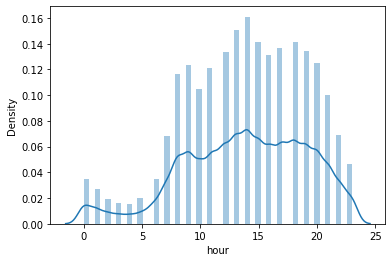

In [ ]:
# Let us plot the distribution of a feature with continuous variables 

sns.distplot(dataset.hour)

In [ ]:
dataset["hour"].fillna(dataset["hour"].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


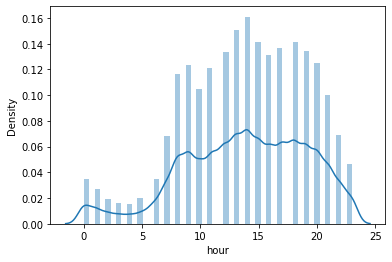

In [ ]:
sns.distplot(dataset.hour)

Well, as filling the missig values with their means doesnt change the distribution. We will be filling continuous features this way  

In [ ]:
for cols in dataset.columns:
  if dataset[cols].isna().any() and type(dataset[cols][0])==np.float64:
    dataset[cols].fillna(dataset[cols].mean(), inplace=True)

In [ ]:
# Checking for remaning missing values

categorical_columns = []

for col in dataset.columns:
  if dataset[col].isna().any():
    categorical_columns.append(col)

print(categorical_columns)

for col in categorical_columns:
  dataset[col].fillna(dataset[col].value_counts().index[0], inplace=True)

['district_name', 'neighborhood_id', 'neighborhood_name', 'street_name', 'postal_code', 'weekday', 'type_day', 'month_name', 'cause_incident']


In [ ]:
dataset.isna().any()

district_id          False
district_name        False
neighborhood_id      False
neighborhood_name    False
street_code          False
street_name          False
postal_code          False
weekday_name         False
weekday              False
type_day             False
year                 False
month                False
month_name           False
day                  False
hour                 False
cyrcadian            False
cause_incident       False
n_deaths             False
n_wounded_mild       False
n_wounded_severe     False
n_victims            False
n_vehicles           False
longitude            False
latitude             False
dtype: bool

### We have dealt with the missing values 

In [ ]:
dataset.head()

,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,weekday_name,weekday,type_day,...,hour,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,longitude,latitude
0,-1.0,Desconegut,-1.0,Desconegut,-1.0,Desconegut,Desconegut,Dimarts,Dm,Laboral,...,12.0,Matí,No és causa del vianant,0.0,2.0,0.0,2.0,2.0,3.350592,60.405022
1,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,134801.0,Freser,0208 0208,Dimarts,Dm,Laboral,...,19.0,Tarda,Desobeir el senyal del semàfor,0.0,1.0,0.0,1.0,1.0,3.350592,60.405022
2,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,161407.0,Indústria,0336 0336,Dissabte,Ds,Laboral,...,21.0,Tarda,No és causa del vianant,0.0,1.0,0.0,1.0,1.0,3.350592,60.405022
3,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,226400.0,Las Navas de Tolosa,0343 0343,Divendres,Dv,Laboral,...,9.0,Matí,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,3.350592,60.405022
4,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,95506.0,Conca,0032 0034,Divendres,Dv,Laboral,...,20.0,Tarda,No és causa del vianant,0.0,2.0,0.0,2.0,1.0,3.350592,60.405022


In [ ]:
categorical_columns

['district_name',
 'neighborhood_id',
 'neighborhood_name',
 'street_name',
 'postal_code',
 'weekday',
 'type_day',
 'month_name',
 'cause_incident']

In [ ]:
# Removing some feature names from the list as they seem irrelevant 

categorical_columns.remove('neighborhood_id')
categorical_columns.remove('postal_code')

In [ ]:
# Let us check the value_counts for categorical columns 

for cols in categorical_columns:
  print(dataset[cols].value_counts(),"\n")


Eixample               32260
Sant Martí             13359
Sarrià-Sant Gervasi    12308
Sants-Montjuïc         11976
Horta-Guinardó          7954
Les Corts               7689
Sant Andreu             7022
Ciutat Vella            6293
Nou Barris              5968
Gràcia                  5603
Desconegut               223
Name: district_name, dtype: int64 

la Dreta de l'Eixample             12355
l'Antiga Esquerra de l'Eixample     6073
Sant Gervasi - Galvany              4633
la Nova Esquerra de l'Eixample      4275
la Sagrada Família                  3829
                                   ...  
la Clota                             176
Ciutat Meridiana                     143
Torre Baró                           128
Vallbona                              77
Can Peguera                           75
Name: neighborhood_name, Length: 75, dtype: int64 

Corts Catalanes                                       4148
Diagonal                                              3454
Aragó                   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'COUNT')

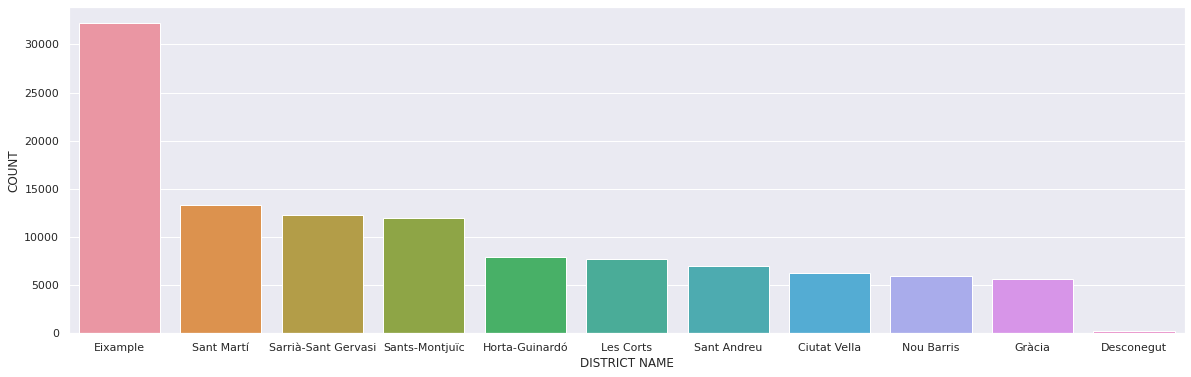

In [85]:
district_count = sns.barplot(dataset['district_name'].value_counts().index,dataset['district_name'].value_counts())
sns.set(rc = {'figure.figsize':(20,6)})
district_count.set_xlabel("DISTRICT NAME")
district_count.set_ylabel("COUNT")

## Observation 


--> We can see that highest number of accidents occured in the district of Eixample and the lowest in Desconegut.


--> We can also note that the accidents in Eixample are significantly high when compared to rest of the districts where accidents follow a similar range. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'COUNT')

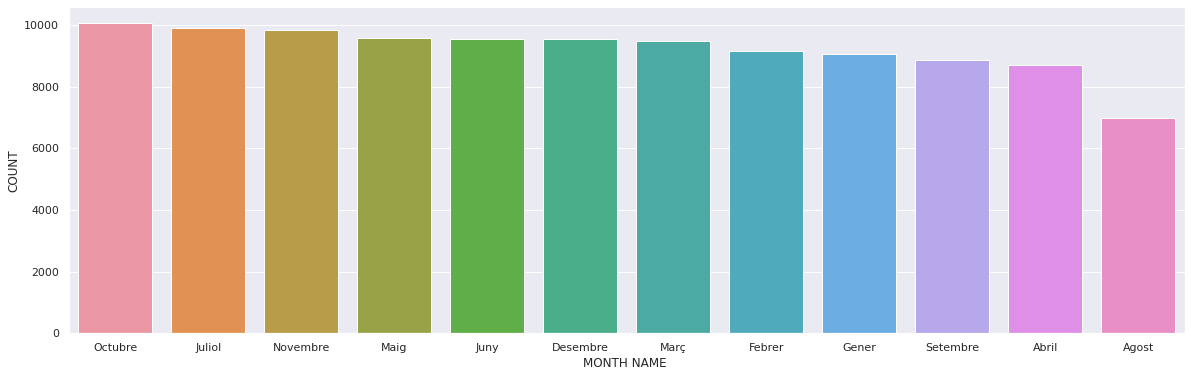

In [86]:
month_count = sns.barplot(dataset['month_name'].value_counts().index,dataset['month_name'].value_counts())
sns.set(rc = {'figure.figsize':(15,8)})
month_count.set_xlabel("MONTH NAME ")
month_count.set_ylabel("COUNT")

## Observation 

We can notice that August is the month with least number of accidents. The other month almost follow a similar pattern with marginal differneces. So, we can say that there is not much of a significance to a particular month. 

([<matplotlib.patches.Wedge at 0x7fcd33ea2e50>,
 [Text(0.3953379332619167, 1.0265027610894168, "la Dreta de l'Eixample"),
  Text(-1.0886408444197992, 0.15767406844800577, "l'Antiga Esquerra de l'Eixample"),
  Text(-0.7144335989747949, -0.8364117602329144, "la Nova Esquerra de l'Eixample"),
  Text(0.0904158565432175, -1.09627778089568, 'la Sagrada Família'),
  Text(0.7573324679066236, -0.7977766185182811, 'el Fort Pienc'),
  Text(1.0648207065036313, -0.27596532934611134, 'Sant Antoni')])

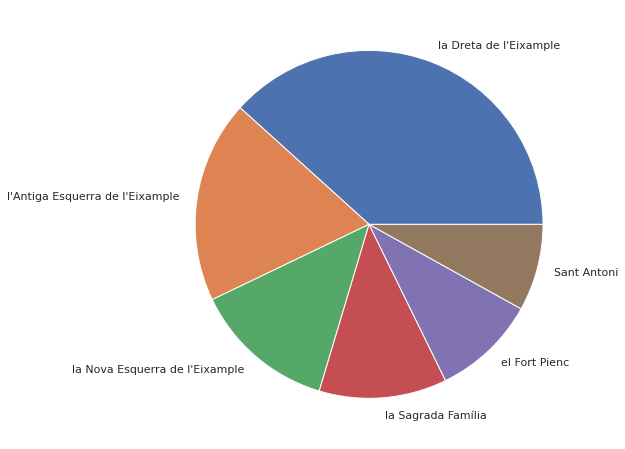

In [103]:
plt.pie(dataset[dataset["district_name"]=="Eixample"]['neighborhood_name'].value_counts(),labels=dataset[dataset["district_name"]=="Eixample"]['neighborhood_name'].value_counts().index)

## Observation :

Most accidents have occured at la Dreta de I'Eixample neighborhood of Eixample district 

In [112]:
# Percentage of accidents in each district 

(dataset["district_name"].value_counts()/len(dataset))*100

Eixample               29.153676
Sant Martí             12.072658
Sarrià-Sant Gervasi    11.122859
Sants-Montjuïc         10.822828
Horta-Guinardó          7.188107
Les Corts               6.948624
Sant Andreu             6.345850
Ciutat Vella            5.687045
Nou Barris              5.393340
Gràcia                  5.063486
Desconegut              0.201527
Name: district_name, dtype: float64